In [1]:
import h5py as h5
import numpy as np
import os
import matplotlib.pyplot as plt

# we will use astropy for some useful constants and units 
from astropy import units as u
from astropy import constants as const

In [2]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

In [5]:
import matplotlib
#Set latex environment for plots/labels
matplotlib.rc('font', **{'family': 'serif'})
matplotlib.rc('text', usetex=False)
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams.update({'font.family':'serif'})


fl=22
fm=18
fs=16


In [6]:
# this is just a little function that we will use to make the plot more beautiful (bigger ticks, labels)
# However, you do not have to use this (just uncommoment "layoutAxes" everywhere)
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)

def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = fm, second=False, labelpad=None, setMinor=True):
#     matplotlib.rc('font', **{'family': 'serif'})

    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


In [13]:
def load_data(ns_kicks, sigmas):    
    SN_KICK_BH_ALL = []
    SN_KICK_NS_ALL = []
    NS_KICK_MULT = []
    SIGMAS = []
       
    
    for ns_kick in ns_kicks:
        for sigma in sigmas:
            path = os.environ['WORK'] + f'/supernova_remnant_production/bh_{bh_kick}_ns_{ns_kick}_sigma_{sigma}_combined.h5'
            print("loading data from", path)
            
            fdata = h5.File(path, 'r')
            
            SN_STELLAR_TYPE = fdata['SSE_Supernovae']["Stellar_Type"][...].squeeze()
            SN_TYPE = fdata['SSE_Supernovae']["SN_Type"][...].squeeze() 
            SN_KICK = fdata['SSE_Supernovae']["Applied_Kick_Magnitude"][...].squeeze()

            maskSN_NS = ((SN_STELLAR_TYPE ==13) * (SN_TYPE == 1)) # select NSs, ignore electron capture SN
            maskSN_BH = ((SN_STELLAR_TYPE ==14) * (SN_TYPE == 1)) # select BHs, ignore electron capture SN
            
            SN_KICK_NS = SN_KICK[maskSN_NS]
            SN_KICK_BH = SN_KICK[maskSN_BH] 

            fdata.close()
            
            SN_KICK_NS_ALL.append(SN_KICK_NS)
            SN_KICK_BH_ALL.append(SN_KICK_BH)
            NS_KICK_MULT.append(ns_kick)
            SIGMAS.append(sigma)
            
    return SN_KICK_NS_ALL, SN_KICK_BH_ALL, NS_KICK_MULT, SIGMAS


In [3]:
# sns.set()

#this is just a little function that we will use to make the plot more beautiful (bigger ticks, labels)
# However, you do not have to use this (just uncommoment "layoutAxes" everywhere)
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)

def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 18, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


# Load in the data files

In [5]:
bh_kick = 200
ns_kicks = [300, 350, 400, 450, 500, 550, 600, 650, 700]
sigmas = [0.1, 0.2, 0.3, 0.4, 0.5]

SN_KICK_NS_ALL, SN_KICK_BH_ALL, NS_KICK_MULT, SIGMAS = load_data(ns_kicks, sigmas)

loading data from /work2/08178/vkapil/frontera/supernova_remnant_production/bh_200_ns_300_sigma_0.1_combined.h5
loading data from /work2/08178/vkapil/frontera/supernova_remnant_production/bh_200_ns_300_sigma_0.2_combined.h5
loading data from /work2/08178/vkapil/frontera/supernova_remnant_production/bh_200_ns_300_sigma_0.3_combined.h5
loading data from /work2/08178/vkapil/frontera/supernova_remnant_production/bh_200_ns_300_sigma_0.4_combined.h5
loading data from /work2/08178/vkapil/frontera/supernova_remnant_production/bh_200_ns_300_sigma_0.5_combined.h5
loading data from /work2/08178/vkapil/frontera/supernova_remnant_production/bh_200_ns_350_sigma_0.1_combined.h5
loading data from /work2/08178/vkapil/frontera/supernova_remnant_production/bh_200_ns_350_sigma_0.2_combined.h5
loading data from /work2/08178/vkapil/frontera/supernova_remnant_production/bh_200_ns_350_sigma_0.3_combined.h5
loading data from /work2/08178/vkapil/frontera/supernova_remnant_production/bh_200_ns_350_sigma_0.4_comb

In [6]:
# Define a dictionary to map v_ns and sigma to their arrays
kick_models = {}
sig = len(sigmas)
vns = len(ns_kicks)

for i in range(len(ns_kicks)):
    kick_models[f"NS_{ns_kicks[i]}_RANGE"] = np.arange(i*sig, (i*sig)+sig, 1)

for i in range(len(sigmas)):
    kick_models[f"SIGMA_{sigmas[i]}_RANGE"] = np.arange(i, (vns*sig) + i, sig)

kick_models["ALL"] = np.arange(0, vns*sig, 1)

In [7]:
print(kick_models["NS_300_RANGE"])
# print(kick_models["NS_350_RANGE"])
print(kick_models["NS_450_RANGE"])

[0 1 2 3 4]
[15 16 17 18 19]


In [8]:
print(kick_models["SIGMA_0.1_RANGE"])
print(kick_models["SIGMA_0.2_RANGE"])
print(kick_models["SIGMA_0.3_RANGE"])
print(kick_models["SIGMA_0.4_RANGE"])
print(kick_models["SIGMA_0.5_RANGE"])

print(kick_models["ALL"])

[ 0  5 10 15 20 25 30 35 40]
[ 1  6 11 16 21 26 31 36 41]
[ 2  7 12 17 22 27 32 37 42]
[ 3  8 13 18 23 28 33 38 43]
[ 4  9 14 19 24 29 34 39 44]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


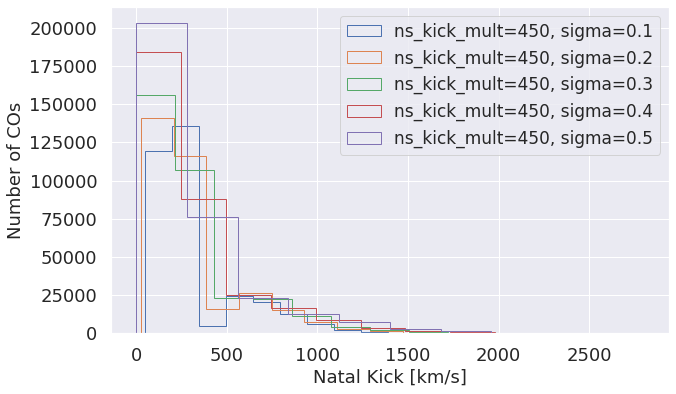

In [9]:
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 

PLOT_RANGE = kick_models["NS_450_RANGE"]
# PLOT_RANGE = np.intersect1d(kick_models["NS_300_RANGE"], kick_models["SIGMA_0.3_RANGE"])
# PLOT_RANGE = kick_models["ALL"]

for i in PLOT_RANGE:
    plt.hist(SN_KICK_NS_ALL[i], label=f'ns_kick_mult={NS_KICK_MULT[i]}, sigma={SIGMAS[i]}', histtype='step');

layoutAxes(ax=ax, nameX='Natal Kick [km/s]',\
           nameY='Number of COs')
plt.legend(fontsize=17)
plt.show()

In [10]:
def plot_kde(PLOT_RANGE, output=None):
    f, ax= plt.subplots(1, 1,  figsize=(10,6)) 
    
    for i in PLOT_RANGE:
        kde_NS = gaussian_kde( SN_KICK_NS_ALL[i] )
        NS_dist_space = linspace( min(SN_KICK_NS_ALL[i]), max(SN_KICK_NS_ALL[i]), 100 )
        label_str = r'$v_{ns}$=' + '{nskick}'.format(nskick=NS_KICK_MULT[i]) + ', $\sigma_{ns}$=' + '{sig}'.format(sig=SIGMAS[i])
        plt.plot( NS_dist_space, kde_NS(NS_dist_space), label=label_str );

    layoutAxes(ax=ax, fontsize = 18)
    plt.xlabel('Natal Kick [km/s]', fontsize=22)
    plt.ylabel('Velocity distribution [km/s]$^{-1}$', fontsize=22)

    plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))

    # plt.ylim(0, 5e-3)
    plt.xlim(0, 1200)

    plt.legend(fontsize=18)
    if output is not None:
        plt.savefig(output)
    plt.show()


# Paper Plots

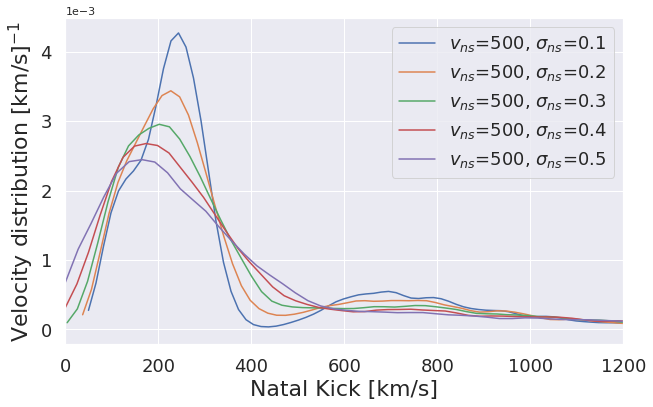

In [19]:
plot_kde(kick_models["NS_500_RANGE"], output='plots/ns_kicks_500_range.pdf')

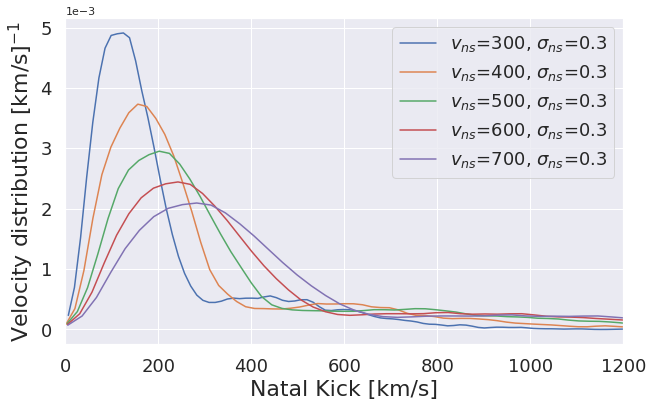

In [20]:
plot_kde(kick_models["SIGMA_0.3_RANGE"][::2], output='plots/sigma_0.3_range.pdf')

## Comparison to Hobbs Maxwellian

In [22]:
from scipy.stats import maxwell

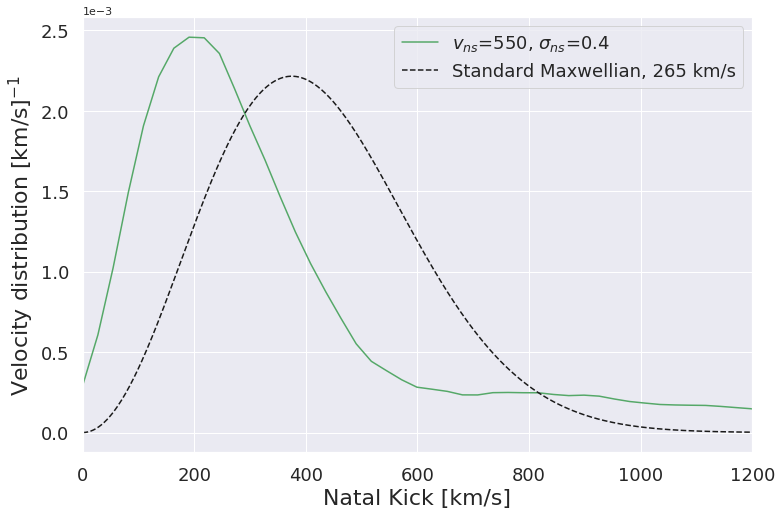

In [38]:
best_index = np.intersect1d(kick_models["NS_550_RANGE"], kick_models["SIGMA_0.4_RANGE"])[0]

kde_NS = gaussian_kde( SN_KICK_NS_ALL[best_index] )
NS_dist_space = linspace( min(SN_KICK_NS_ALL[best_index]), max(SN_KICK_NS_ALL[best_index]), 100 )
label_str = r'$v_{ns}$=' + '{nskick}'.format(nskick=NS_KICK_MULT[best_index]) + ', $\sigma_{ns}$=' + '{sig}'.format(sig=SIGMAS[best_index])

f, ax= plt.subplots(1, 1,  figsize=(12,8)) 

plt.plot( NS_dist_space, kde_NS(NS_dist_space), color='g', label=label_str );

x = np.linspace(0, 1200, 500)
plt.plot(x, maxwell.pdf(x, 0, 265), 'k--', label='Standard Maxwellian, 265 km/s')


plt.xlim(0, 1200)

layoutAxes(ax=ax, fontsize = 18)
plt.xlabel('Natal Kick [km/s]', fontsize=22)
plt.ylabel('Velocity distribution [km/s]$^{-1}$', fontsize=22)
plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))

plt.legend(fontsize=18, loc='best')

plt.savefig('plots/hobbs_vs_best.pdf')

plt.show()

# Other plots

# Investigating the bump in sigma=0.01 distributions

In [8]:
vns = 400
sigma = 0.01
path = os.environ['WORK'] + f'/supernova_remnant/bh_200_ns_{vns}_sigma_{sigma}_combined.h5'
print("loading data from", path)

fdata = h5.File(path, 'r')

SN_STELLAR_TYPE = fdata['SSE_Supernovae']["Stellar_Type"][...].squeeze()
SN_TYPE = fdata['SSE_Supernovae']["SN_Type"][...].squeeze() 
SN_KICK = fdata['SSE_Supernovae']["Applied_Kick_Magnitude"][...].squeeze()
SN_MASS_CORE = fdata['SSE_Supernovae']["Mass_CO_Core@CO"][...].squeeze()

maskSN_NS = ((SN_STELLAR_TYPE ==13) * (SN_TYPE == 1)) # select NSs, ignore electron capture SN

fdata.close()
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 

s=0.2
plt.scatter(SN_KICK[maskSN_NS], SN_MASS_CORE[maskSN_NS], s=s, color='r', label='NS')


layoutAxes(ax=ax, nameY='CO Core Mass [Msun]',\
           nameX='Kick [km/s]]')

plt.title(f"vns = {vns}, sigma = {sigma}", fontsize=18)

plt.show()
plot_kde(np.intersect1d(NS_400_RANGE, SIGMA_001_RANGE))

loading data from /work2/08178/vkapil/frontera/supernova_remnant_production/bh_200_ns_500_sigma_0.3_combined.h5


OSError: Unable to open file (unable to open file: name = '/work2/08178/vkapil/frontera/supernova_remnant_production/bh_200_ns_500_sigma_0.3_combined.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

It looks like any objects with a pre-supernova core mass above ~4.5 M_sun are boosted up to a kick velocity of ~500 km/s. This lines up with the secondary bump we see in the natal kick distribution.

loading data from /work2/08178/vkapil/frontera/supernova_remnant/bh_200_ns_400_sigma_0.3_combined.h5


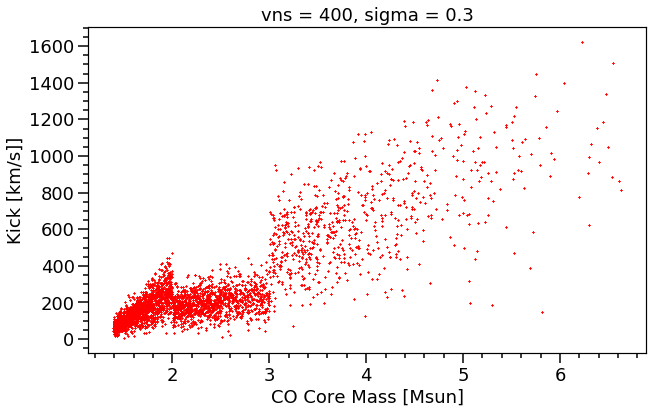

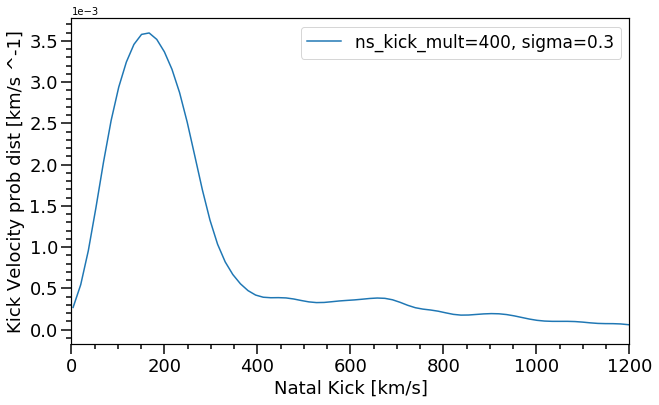

In [13]:
vns = 400
sigma = 0.3
path = os.environ['WORK'] + f'/supernova_remnant/bh_200_ns_{vns}_sigma_{sigma}_combined.h5'
print("loading data from", path)

fdata = h5.File(path, 'r')

SN_STELLAR_TYPE = fdata['SSE_Supernovae']["Stellar_Type"][...].squeeze()
SN_TYPE = fdata['SSE_Supernovae']["SN_Type"][...].squeeze() 
SN_KICK = fdata['SSE_Supernovae']["Applied_Kick_Magnitude"][...].squeeze()
SN_MASS_CORE = fdata['SSE_Supernovae']["Mass_CO_Core@CO"][...].squeeze()

maskSN_NS = ((SN_STELLAR_TYPE ==13) * (SN_TYPE == 1)) # select NSs, ignore electron capture SN

fdata.close()

f, ax= plt.subplots(1, 1,  figsize=(10,6)) 

s=0.2
plt.scatter( SN_MASS_CORE[maskSN_NS],SN_KICK[maskSN_NS], s=s, color='r', label='NS')


layoutAxes(ax=ax, nameX='CO Core Mass [Msun]',\
           nameY='Kick [km/s]]')

plt.title(f"vns = {vns}, sigma = {sigma}", fontsize=18)
plt.show()
plot_kde(np.intersect1d(NS_400_RANGE, SIGMA_03_RANGE))

The effect is less visible here because the mass kicks are spread out at each mass cut.

# Investigate if this feature existed before SIGMAKICK mods

loading data from /work2/08178/vkapil/frontera/supernova_remnant/bh_200_ns_400_combined.h5


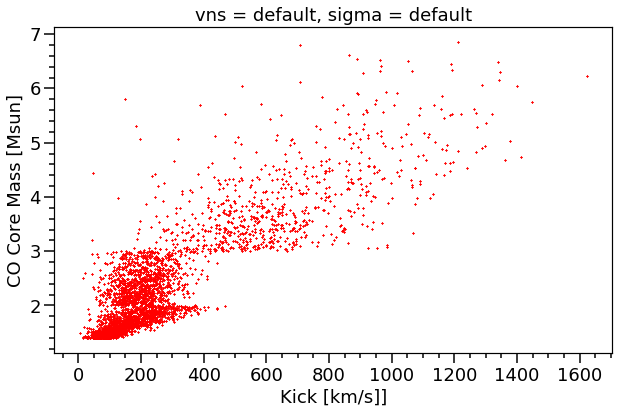

In [14]:
vns = 400
# path = os.environ['WORK'] + f'/supernova_remnant_default/sn_default_combined.h5'
path = os.environ['WORK'] + f'/supernova_remnant/bh_200_ns_{vns}_combined.h5'
print("loading data from", path)

fdata = h5.File(path, 'r')

SN_STELLAR_TYPE = fdata['SSE_Supernovae']["Stellar_Type"][...].squeeze()
SN_TYPE = fdata['SSE_Supernovae']["SN_Type"][...].squeeze() 
SN_KICK = fdata['SSE_Supernovae']["Applied_Kick_Magnitude"][...].squeeze()
SN_MASS_CORE = fdata['SSE_Supernovae']["Mass_CO_Core@CO"][...].squeeze()

MASS_REM = fdata['SSE_System_Parameters']["Mass"][...].squeeze()
MASS_ZAMS = fdata['SSE_System_Parameters']["Mass@ZAMS"][...].squeeze()


maskSN_NS = ((SN_STELLAR_TYPE ==13) * (SN_TYPE == 1)) # select NSs, ignore electron capture SN

fdata.close()

f, ax= plt.subplots(1, 1,  figsize=(10,6)) 

s=0.2
plt.scatter(SN_KICK[maskSN_NS], SN_MASS_CORE[maskSN_NS], s=s, color='r', label='NS')


layoutAxes(ax=ax, nameY='CO Core Mass [Msun]',\
           nameX='Kick [km/s]]')

plt.title(f"vns = default, sigma = default", fontsize=18)
plt.show()
# plot_kde(np.intersect1d(NS_400_RANGE, SIGMA_03_RANGE))

# List the important Run Options

In [12]:
vns = 400
sigma = 0.1
path = os.environ['WORK'] + f'/supernova_remnant_production/bh_200_ns_{vns}_sigma_{sigma}_combined.h5'
print("loading data from", path)

fdata = h5.File(path, 'r')

loading data from /work2/08178/vkapil/frontera/supernova_remnant_production/bh_200_ns_400_sigma_0.1_combined.h5


In [13]:
fdata.keys()

<KeysViewHDF5 ['Run_Details', 'SSE_Supernovae', 'SSE_System_Parameters']>

In [13]:
fdata['SSE_Supernovae'].keys()

<KeysViewHDF5 ['Applied_Kick_Magnitude', 'Drawn_Kick_Magnitude', 'Fallback_Fraction', 'Is_Hydrogen_Poor', 'Mass', 'Mass_CO_Core@CO', 'Mass_Core@CO', 'Mass_He_Core@CO', 'Mass_Total@CO', 'SEED', 'SN_Kick_Mean_Anomaly', 'SN_Type', 'Stellar_Type', 'Stellar_Type_Prev', 'Time']>

In [16]:
SSE_SYSTEM = fdata['SSE_System_Parameters']

In [17]:
SSE_SYSTEM.keys()

<KeysViewHDF5 ['CH_on_MS', 'LBV_Factor', 'Mass', 'Mass@ZAMS', 'Metallicity@ZAMS', 'Omega@ZAMS', 'Radius@ZAMS', 'SEED', 'SN_Kick_Magnitude_Random_Number', 'Sigma_Kick_CCSN_BH', 'Sigma_Kick_CCSN_NS', 'Sigma_Kick_ECSN', 'Sigma_Kick_USSN', 'Stellar_Type', 'Stellar_Type@ZAMS', 'WR_Factor']>

In [19]:
ZAMS_Z = SSE_SYSTEM["Metallicity@ZAMS"][...].squeeze()
ZAMS_Z

array([0.0142, 0.0142, 0.0142, ..., 0.0142, 0.0142, 0.0142])

In [ ]:
fdata.close()

# Check if ECSN Peak exists

In [14]:
kick_types = ['Applied_Kick_Magnitude']

kick_type = kick_types[0]
vns = 400
sigma = 0.2
path = os.environ['WORK']+f'/supernova_remnant_production/bh_200_ns_{vns}_sigma_{sigma}_combined.h5'

In [21]:
fdata_bse = h5.File(path, 'r')
list(fdata_bse.keys())


BSE_SN_STELLAR_TYPE = fdata_bse['SSE_Supernovae']["Stellar_Type"][...].squeeze()
BSE_SN_TYPE = fdata_bse['SSE_Supernovae']["SN_Type"][...].squeeze() 


BSE_SN_KICK = fdata_bse['SSE_Supernovae'][kick_type][...].squeeze()

fdata_bse.close()

In [22]:
BSE_mask_CCSN_NS = ((BSE_SN_STELLAR_TYPE ==13) * (BSE_SN_TYPE == 1))  # select unbound NSs, ignore electron capture SN
BSE_mask_ALLSN_NS = ((BSE_SN_STELLAR_TYPE ==13)) # select unbound NSs, ignore electron capture SN

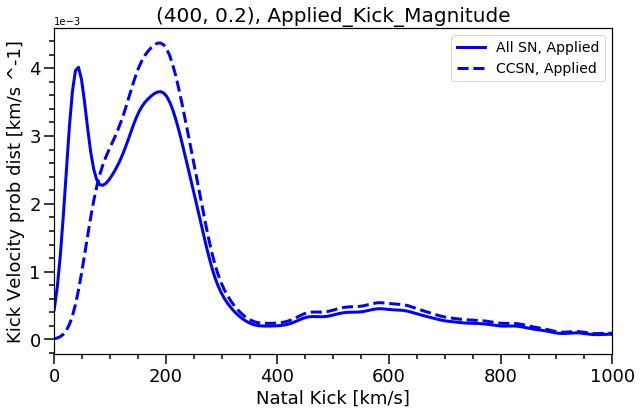

In [23]:
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 



kde_dist_space = linspace( min(BSE_SN_KICK), max(BSE_SN_KICK), 300 )

kde_CCSN_NS = gaussian_kde( BSE_SN_KICK[BSE_mask_CSSN_NS] )

kde_ALLSN_NS = gaussian_kde( BSE_SN_KICK[BSE_mask_ALLSN_NS] )



layoutAxes(ax=ax, nameX='Natal Kick [km/s]',\
       nameY='Kick Velocity prob dist [km/s ^-1]')


plt.plot( kde_dist_space, kde_ALLSN_NS(kde_dist_space), c='b', linestyle='-', lw=3, label='All SN, Applied')
plt.plot( kde_dist_space, kde_CCSN_NS(kde_dist_space), c='b', linestyle='--', lw=3, label='CCSN, Applied')



plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
plt.xlim(0,1000)
plt.legend(fontsize=14)

plt.title(f'({vns}, {sigma}), {kick_type}', fontsize=20)

plt.show()

# New Seed Simulations

In [9]:
# check if the unique seed trick worked
ns_kicks = [300, 350, 400, 450, 500, 550, 600, 650, 700]
sigmas = [0.1, 0.2, 0.3, 0.4, 0.5]

for vns in ns_kicks:
    for sigma in sigmas:
        print(f"{vns}, {sigma}")
        path = os.environ['SCRATCH']+f'/supernova_remnant_sse_production/bh_200_ns_{vns}_sigma_{sigma}_combined.h5'
        fdata_bse = h5.File(path, 'r')
        SEED = fdata_bse['SSE_System_Parameters']["SEED"][...].squeeze() 
        fdata_bse.close()
        unique, counts = np.unique(SEED, return_counts=True)
        
        if len(SEED) != len(unique):
            print(len(SEED))
            print(len(unique))
    print()
    


300, 0.1
300, 0.2
300, 0.3
300, 0.4
300, 0.5

350, 0.1
350, 0.2
350, 0.3
350, 0.4
350, 0.5

400, 0.1
400, 0.2
400, 0.3
400, 0.4
400, 0.5

450, 0.1
450, 0.2
450, 0.3
450, 0.4
450, 0.5

500, 0.1
500, 0.2
500, 0.3
500, 0.4
500, 0.5

550, 0.1
550, 0.2
550, 0.3
550, 0.4
550, 0.5

600, 0.1
600, 0.2
600, 0.3
600, 0.4
600, 0.5

650, 0.1
650, 0.2
650, 0.3
650, 0.4
650, 0.5

700, 0.1
700, 0.2
700, 0.3
700, 0.4
700, 0.5



# Cluster Retention

In [3]:
path = os.environ['SCRATCH']+f'/supernova_remnant_sse_production/bh_200_ns_500_sigma_0.3_combined.h5'
fdata_bse = h5.File(path, 'r')
sn_type = fdata_bse['SSE_Supernovae']["SN_Type"][...].squeeze() 
stellar_type = fdata_bse['SSE_Supernovae']["Stellar_Type"][...].squeeze() 
kicks = fdata_bse['SSE_Supernovae']["Applied_Kick_Magnitude"][...].squeeze() 
fdata_bse.close()

In [14]:
for t in range(20):
    print(np.sum(sn_type==t))

0
525820
64543
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [10]:
ns_kicks = kicks[(stellar_type==13)*(sn_type==1)]
print(f"{100 * (np.sum(ns_kicks<50)/len(ns_kicks)):.4f}% of single MM20 NSs remain in clusters. (CCSN only)")

1.0012% of single MM20 NSs remain in clusters.


In [11]:
ns_kicks = kicks[(stellar_type==13)*(sn_type==2)]
print(f"{100 * (np.sum(ns_kicks<50)/len(ns_kicks)):.4f}% of single MM20 NSs remain in clusters. (ECSN only)")

ns_kicks = kicks[(stellar_type==13)]
print(f"{100 * (np.sum(ns_kicks<50)/len(ns_kicks)):.4f}% of single MM20 NSs remain in clusters. (All SN)")

55.1725% of single MM20 NSs remain in clusters. (ECSN only)
9.9466% of single MM20 NSs remain in clusters. (All SN)


In [67]:
path = os.environ['SCRATCH']+f'/supernova_remnant_sse_production/hobbs_bh_200_ns_500_sigma_0.3_combined.h5'
fdata_bse = h5.File(path, 'r')
sn_type_hobbs = fdata_bse['SSE_Supernovae']["SN_Type"][...].squeeze() 
stellar_type_hobbs = fdata_bse['SSE_Supernovae']["Stellar_Type"][...].squeeze() 
kicks_hobbs = fdata_bse['SSE_Supernovae']["Applied_Kick_Magnitude"][...].squeeze() 
fdata_bse.close()

In [68]:
ns_kicks_hobbs = kicks_hobbs[(stellar_type_hobbs==13)*(sn_type_hobbs==1)]
print(f"{100 * (1- (np.sum(ns_kicks_hobbs>50)/len(ns_kicks_hobbs))):.2f}% of single Hobbs NSs remain in clusters.")

0.21% of single Hobbs NSs remain in clusters.


## CDF Comparison

In [69]:
path = os.environ['SCRATCH']+f'/supernova_remnant_sse_production/bh_200_ns_500_sigma_0.3_combined.h5'
fdata_bse = h5.File(path, 'r')
mm_stellar_type = fdata_bse['SSE_Supernovae']["Stellar_Type"][...].squeeze() 
mm_sn_type = fdata_bse['SSE_Supernovae']["SN_Type"][...].squeeze() 
mm_kicks = fdata_bse['SSE_Supernovae']["Applied_Kick_Magnitude"][...].squeeze() 
fdata_bse.close()

mm_kicks_ns = mm_kicks[(mm_stellar_type==13)*(mm_sn_type == 1)]
mm_kicks_ns_ccsn = mm_kicks[(mm_stellar_type==13)*(mm_sn_type == 1)]
mm_kicks_ns_ecsn = mm_kicks[(mm_stellar_type==13)*(mm_sn_type == 2)]


path = os.environ['SCRATCH']+f'/supernova_remnant_sse_production/hobbs_bh_200_ns_500_sigma_0.3_combined.h5'
fdata_bse = h5.File(path, 'r')
hobbs_stellar_type = fdata_bse['SSE_Supernovae']["Stellar_Type"][...].squeeze() 
hobbs_sn_type = fdata_bse['SSE_Supernovae']["SN_Type"][...].squeeze() 
hobbs_kicks = fdata_bse['SSE_Supernovae']["Applied_Kick_Magnitude"][...].squeeze() 
fdata_bse.close()

hobbs_kicks_ns = hobbs_kicks[(hobbs_stellar_type==13)*(hobbs_sn_type == 1)]
hobbs_kicks_ns_ccsn = hobbs_kicks[(hobbs_stellar_type==13)*(hobbs_sn_type == 1)]
hobbs_kicks_ns_ecsn = hobbs_kicks[(hobbs_stellar_type==13)*(hobbs_sn_type == 2)]


In [70]:
def get_projected_velocity(model_velocities):
    # Project onto a plane with isotropically distributed orientation.
    # Only need to project wrt theta, since phi orientation doesn't matter for a transverse velocity
    # So v_transverse = sqrt(1-(cos^2(theta)) where cos(theta) = uniform(0,1)
    
    cosTheta = np.random.uniform(0,1,len(model_velocities))
    transverse_velocities = np.abs(model_velocities * np.sqrt(1 - cosTheta**2))
    
    return transverse_velocities

In [71]:
mm_kicks_2d = get_projected_velocity(mm_kicks_ns)
hobbs_kicks_2d = get_projected_velocity(hobbs_kicks_ns)

In [72]:
def plot_cdf_no_bins(NS_KICKS, n_cdf=1, n_draws=81, label='cdf', color='C0', ax=ax1, *args, **kwargs):    
    
    data = np.random.choice(NS_KICKS, n_draws)
    data_sorted = np.sort(data)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted, p, color=color, *args, **kwargs)
    
    ax.plot(data_sorted, p, label=label, alpha=0, color=color)   
    return data_sorted, p

In [73]:
import matplotlib

#Set latex environment for plots/labels
# matplotlib.rc('font', **{'family': 'serif'})
matplotlib.rc('text', usetex=False)
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams.update({'font.family':'serif'})


fl=22
fm=18
fs=16


In [74]:
# this is just a little function that we will use to make the plot more beautiful (bigger ticks, labels)
# However, you do not have to use this (just uncommoment "layoutAxes" everywhere)
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)

def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = fm, second=False, labelpad=None, setMinor=True):
    matplotlib.rc('font', **{'family': 'serif'})

    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


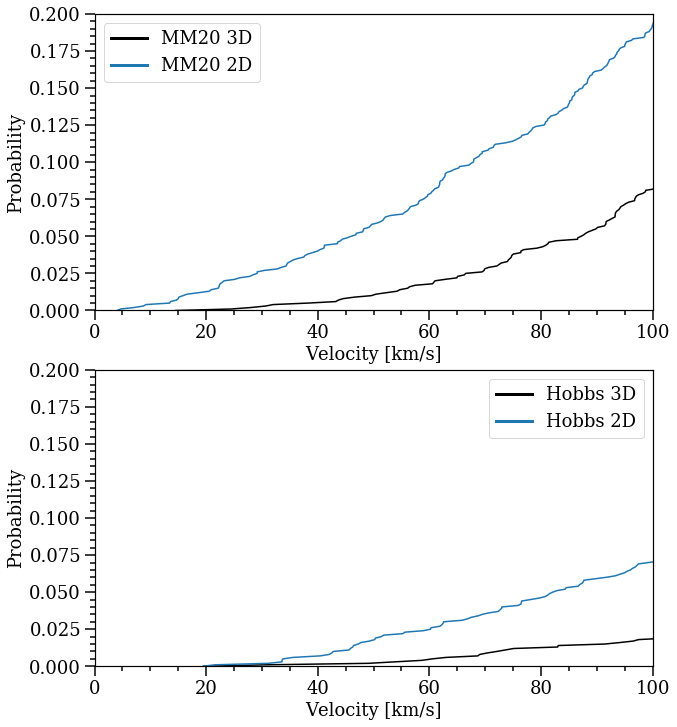

In [75]:
f, (ax1, ax2)= plt.subplots(2, 1,  figsize=(10,12))

layoutAxes(ax=ax1, nameX='Velocity [km/s]', nameY='Probability', fontsize=fm)

n_cdf = 1
n_draws = 1000

         
data_mm, p_mm = plot_cdf_no_bins(mm_kicks_ns, n_cdf=n_cdf, n_draws=n_draws, label='MM20 3D', color='k', ax=ax1)
plot_cdf_no_bins(mm_kicks_2d, n_cdf=n_cdf, n_draws=n_draws, label='MM20 2D', ax=ax1)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 0.2)

leg = ax1.legend(fontsize=fm)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_linewidth(3)
    
data_hobbs, p_hobbs = plot_cdf_no_bins(hobbs_kicks_ns, n_cdf=n_cdf, n_draws=n_draws, label='Hobbs 3D', color='k', ax=ax2)
plot_cdf_no_bins(hobbs_kicks_2d, n_cdf=n_cdf, n_draws=n_draws, label='Hobbs 2D', ax=ax2)
ax2.set_xlim(0,100)
ax2.set_ylim(0, 0.2)

layoutAxes(ax=ax2, nameX='Velocity [km/s]', nameY='Probability', fontsize=fm)
leg = plt.legend(fontsize=fm)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_linewidth(3)
    
plt.show()

In [81]:
index = np.where(data_mm>50)[0][0]
print(f"Probability at 3D velocity = {data_mm[index]:.2f} km/s: {p_mm[index]:.4f}")

Probability at 3D velocity = 50.42 km/s: 0.0110


In [80]:
index = np.where(data_hobbs>50)[0][0]
print(f"Probability at 3D velocity = {data_hobbs[index]:.2f} km/s: {p_hobbs[index]:.4f}")

Probability at 3D velocity = 53.79 km/s: 0.0030


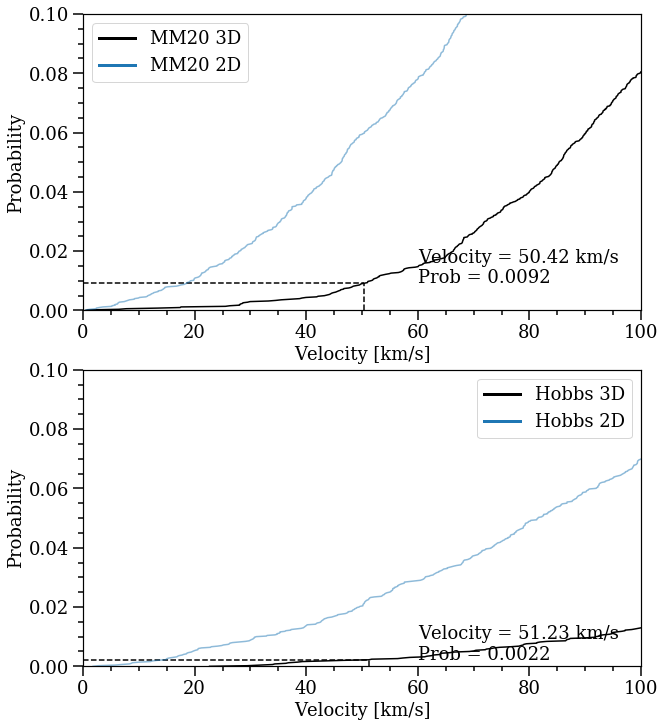

In [87]:
f, (ax1, ax2)= plt.subplots(2, 1,  figsize=(10,12))

n_cdf = 1
n_draws = 5000
data_mm, p_mm = plot_cdf_no_bins(mm_kicks_ns, n_cdf=n_cdf, n_draws=n_draws, label='MM20 3D', color='k', ax=ax1)

index = np.where(data_mm>50)[0][0]
ax1.hlines(y=p_mm[index], xmin=0, xmax=data_mm[index], color='k', linestyles='--')
ax1.vlines(x=data_mm[index], ymin=0, ymax=p_mm[index], color='k', linestyles='--')
s = f"Velocity = {data_mm[index]:.2f} km/s\nProb = {p_mm[index]:.4f}"
ax1.text(60, p_mm[index], s, fontsize=fm)

plot_cdf_no_bins(mm_kicks_2d, n_cdf=n_cdf, n_draws=n_draws, label='MM20 2D', alpha=0.5, ax=ax1)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 0.1)

layoutAxes(ax=ax1, nameX='Velocity [km/s]', nameY='Probability', fontsize=fm)

leg = ax1.legend(fontsize=fm)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_linewidth(3)
    
    
    
    
data_hobbs, p_hobbs = plot_cdf_no_bins(hobbs_kicks_ns, n_cdf=n_cdf, n_draws=n_draws, label='Hobbs 3D', color='k', ax=ax2)

index = np.where(data_hobbs>50)[0][0]
ax2.hlines(y=p_hobbs[index], xmin=0, xmax=data_hobbs[index], color='k', linestyles='--')
ax2.vlines(x=data_hobbs[index], ymin=0, ymax=p_hobbs[index], color='k', linestyles='--')
s = f"Velocity = {data_hobbs[index]:.2f} km/s\nProb = {p_hobbs[index]:.4f}"
ax2.text(60, p_hobbs[index], s, fontsize=fm)

plot_cdf_no_bins(hobbs_kicks_2d, n_cdf=n_cdf, n_draws=n_draws, label='Hobbs 2D', alpha=0.5, ax=ax2)
ax2.set_xlim(0,100)
ax2.set_ylim(0, 0.1)

layoutAxes(ax=ax2, nameX='Velocity [km/s]', nameY='Probability', fontsize=fm)
leg = ax2.legend(fontsize=fm)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_linewidth(3)
    
plt.show()

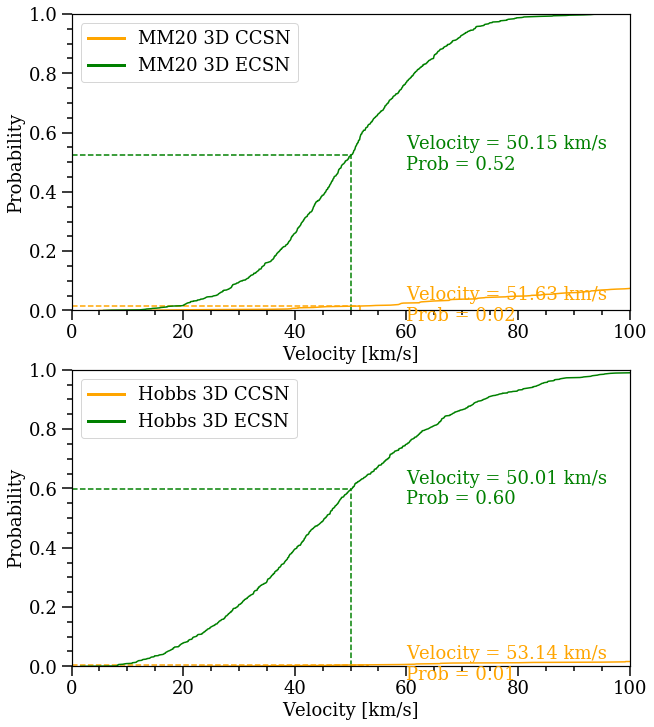

In [49]:
f, (ax1, ax2)= plt.subplots(2, 1,  figsize=(10,12))

n_cdf = 1
n_draws = 1000
data_ccsn, p_ccsn = plot_cdf_no_bins(mm_kicks_ns_ccsn, n_cdf=n_cdf, n_draws=n_draws, label='MM20 3D CCSN', color='orange', ax=ax1)
index = np.where(data_ccsn>50)[0][0]
ax1.hlines(y=p_ccsn[index], xmin=0, xmax=data_ccsn[index], color='orange', linestyles='--')
ax1.vlines(x=data_ccsn[index], ymin=0, ymax=p_ccsn[index], color='orange', linestyles='--')
s = f"Velocity = {data_ccsn[index]:.2f} km/s\nProb = {p_ccsn[index]:.2f}"
ax1.text(60, p_ccsn[index]-0.05, s, fontsize=fm, color='orange')

data_ecsn, p_ecsn = plot_cdf_no_bins(mm_kicks_ns_ecsn, n_cdf=n_cdf, n_draws=n_draws, label='MM20 3D ECSN', color='green', ax=ax1)
index = np.where(data_ecsn>50)[0][0]
ax1.hlines(y=p_ecsn[index], xmin=0, xmax=data_ecsn[index], color='g', linestyles='--')
ax1.vlines(x=data_ecsn[index], ymin=0, ymax=p_ecsn[index], color='g', linestyles='--')
s = f"Velocity = {data_ecsn[index]:.2f} km/s\nProb = {p_ecsn[index]:.2f}"
ax1.text(60, p_ecsn[index]-0.05, s, fontsize=fm, color='g')
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 1)

layoutAxes(ax=ax1, nameX='Velocity [km/s]', nameY='Probability', fontsize=fm)

leg = ax1.legend(fontsize=fm)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_linewidth(3)
    
    
    
    
data_ccsn, p_ccsn = plot_cdf_no_bins(hobbs_kicks_ns_ccsn, n_cdf=n_cdf, n_draws=n_draws, label='Hobbs 3D CCSN', color='orange', ax=ax2)
index = np.where(data_ccsn>50)[0][0]
ax2.hlines(y=p_ccsn[index], xmin=0, xmax=data_ccsn[index], color='orange', linestyles='--')
ax2.vlines(x=data_ccsn[index], ymin=0, ymax=p_ccsn[index], color='orange', linestyles='--')
s = f"Velocity = {data_ccsn[index]:.2f} km/s\nProb = {p_ccsn[index]:.2f}"
ax2.text(60, p_ccsn[index]-0.05, s, fontsize=fm, color='orange')


data_ecsn, p_ecsn = data_hobbs, p_hobbs = plot_cdf_no_bins(hobbs_kicks_ns_ecsn, n_cdf=n_cdf, n_draws=n_draws, label='Hobbs 3D ECSN', color='green', ax=ax2)
index = np.where(data_ecsn>50)[0][0]
ax2.hlines(y=p_ecsn[index], xmin=0, xmax=data_ecsn[index], color='g', linestyles='--')
ax2.vlines(x=data_ecsn[index], ymin=0, ymax=p_ecsn[index], color='g', linestyles='--')
s = f"Velocity = {data_ecsn[index]:.2f} km/s\nProb = {p_ecsn[index]:.2f}"
ax2.text(60, p_ecsn[index]-0.05, s, fontsize=fm, color='g')

ax2.set_xlim(0,100)
ax2.set_ylim(0, 1)

layoutAxes(ax=ax2, nameX='Velocity [km/s]', nameY='Probability', fontsize=fm)
leg = ax2.legend(fontsize=fm)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh.set_linewidth(3)
    
plt.show()

# Presentation Plots

In [11]:
path = os.environ['SCRATCH']+f'/supernova_remnant_sse_production/bh_200_ns_500_sigma_0.3_combined.h5'
fdata = h5.File(path, 'r')
stellar_type = fdata['SSE_Supernovae']["Stellar_Type"][...].squeeze() 
sn_type = fdata['SSE_Supernovae']["SN_Type"][...].squeeze() 
kicks = fdata['SSE_Supernovae']["Applied_Kick_Magnitude"][...].squeeze() 
co_core = fdata['SSE_Supernovae']["Mass_CO_Core@CO"][...].squeeze() 
fdata.close()

kicks_ns = kicks[(stellar_type==13)*(sn_type == 1)]
co_core_ns = co_core[(stellar_type==13)*(sn_type == 1)]


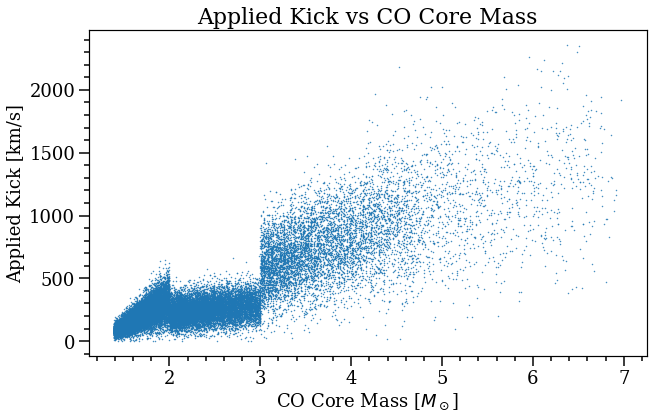

In [47]:
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 

s=0.2
plt.scatter(co_core_ns[::10], kicks_ns[::10], s=s)


layoutAxes(ax=ax, nameX='CO Core Mass [$M_\odot$]',\
           nameY='Applied Kick [km/s]', fontsize=fm)

plt.title(f"Applied Kick vs CO Core Mass", fontsize=fl)

plt.show()

In [22]:
def plot_cdf_no_bins(NS_KICKS, ax, n_cdf=1, n_draws=81, color='C0', *args, **kwargs):    
    
    data = np.random.choice(NS_KICKS, n_draws)
    data_sorted = np.sort(data)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    ax.plot(data_sorted, p, color=color, *args, **kwargs)
    
    ax.plot(data_sorted, p, alpha=0, color=color)   
    return data_sorted, p

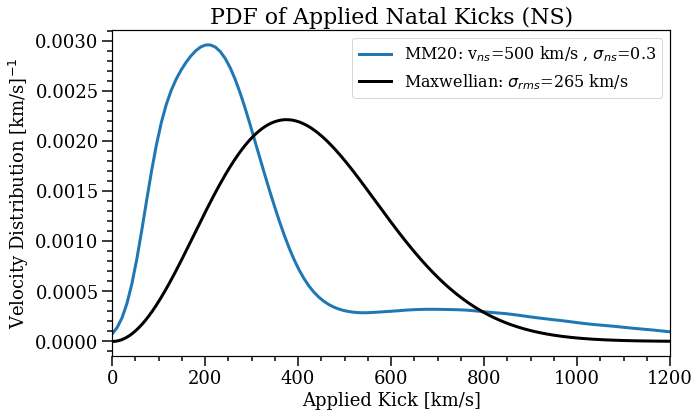

In [53]:
from scipy.stats import maxwell

kde_dist_space = linspace( min(kicks_ns), max(kicks_ns), 300 )
kde_ns = gaussian_kde( kicks_ns )

f, (ax1)= plt.subplots(1, 1,  figsize=(10,6))
layoutAxes(ax=ax1, nameX='Applied Kick [km/s]', nameY='Velocity Distribution [km/s]$^{-1}$', fontsize=fm)

label_str = r'MM20: v$_{ns}$=500 km/s , $\sigma_{ns}$=0.3'
plt.plot(kde_dist_space, kde_ns(kde_dist_space), lw=3, label=label_str)


x = np.linspace(0, 1200, 500)
plt.plot(x, maxwell.pdf(x, 0, 265), 'k', lw=3, label='Maxwellian: $\sigma_{rms}$=265 km/s')


plt.title('PDF of Applied Natal Kicks (NS)', fontsize=fl)
plt.xlim(0, 1200)

plt.legend(fontsize=fs)

plt.show()  

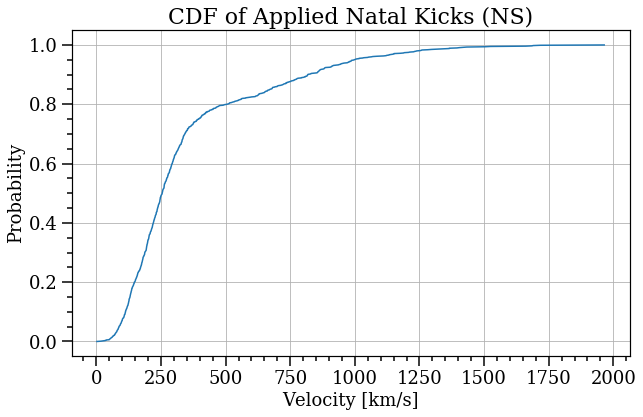

In [35]:
f, (ax1)= plt.subplots(1, 1,  figsize=(10,6))

layoutAxes(ax=ax1, nameX='Velocity [km/s]', nameY='Probability', fontsize=fm)

n_cdf = 1
n_draws = 1000     
data_mm, p_mm = plot_cdf_no_bins(kicks_ns, ax1, n_cdf=n_cdf, n_draws=n_draws)
plt.title('CDF of Applied Natal Kicks (NS)', fontsize=fl)

plt.grid()
plt.show()   